In [1]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image

I really tried. I slashed the CNN model down to almost nothing and it still crashes my kernel. My local machine and the github codespaces simply aren't powerful enough to run this type of model. If there's anything else that you want me to try, I'm happy to do so. However I think this is as far as I'm getting.

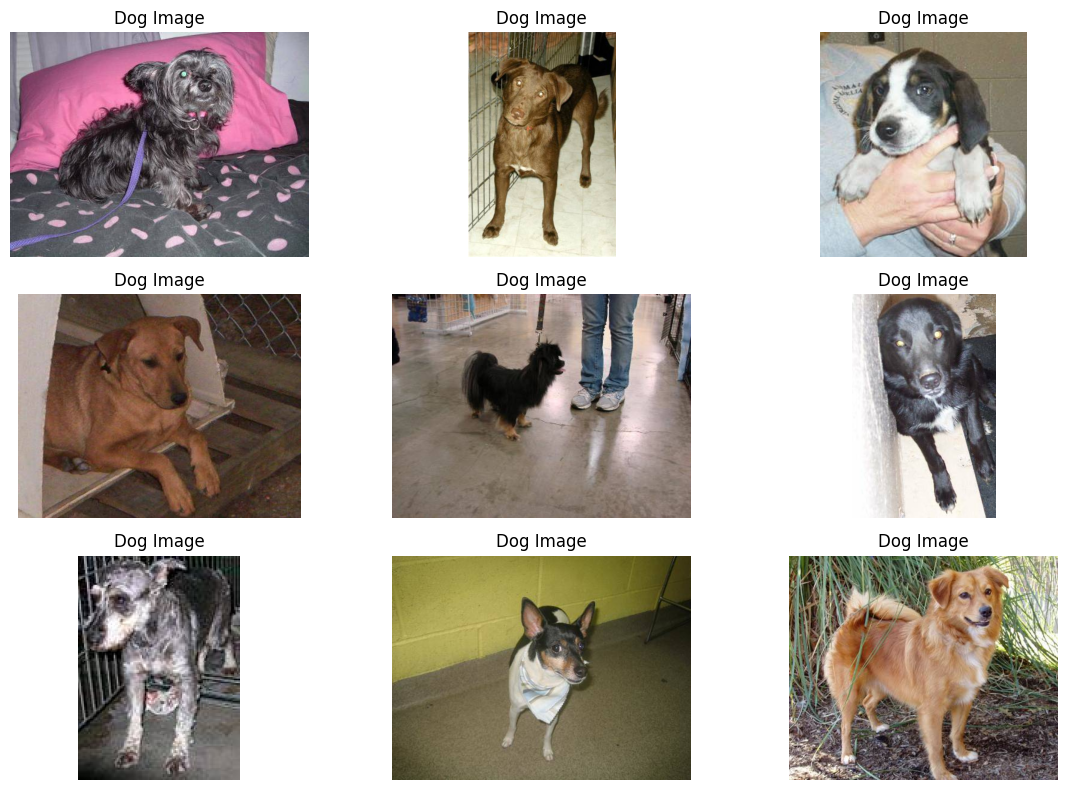

In [2]:
# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = "c:/Users/Philip Nancollas/IdeaProjects/Python/Image Classifier/Training Images/"

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "Dogs")

# dog_subfolder = "\Dogs"

# Get a list of all dog image file names
dog_image_files = os.listdir("Training Images/Dogs")

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

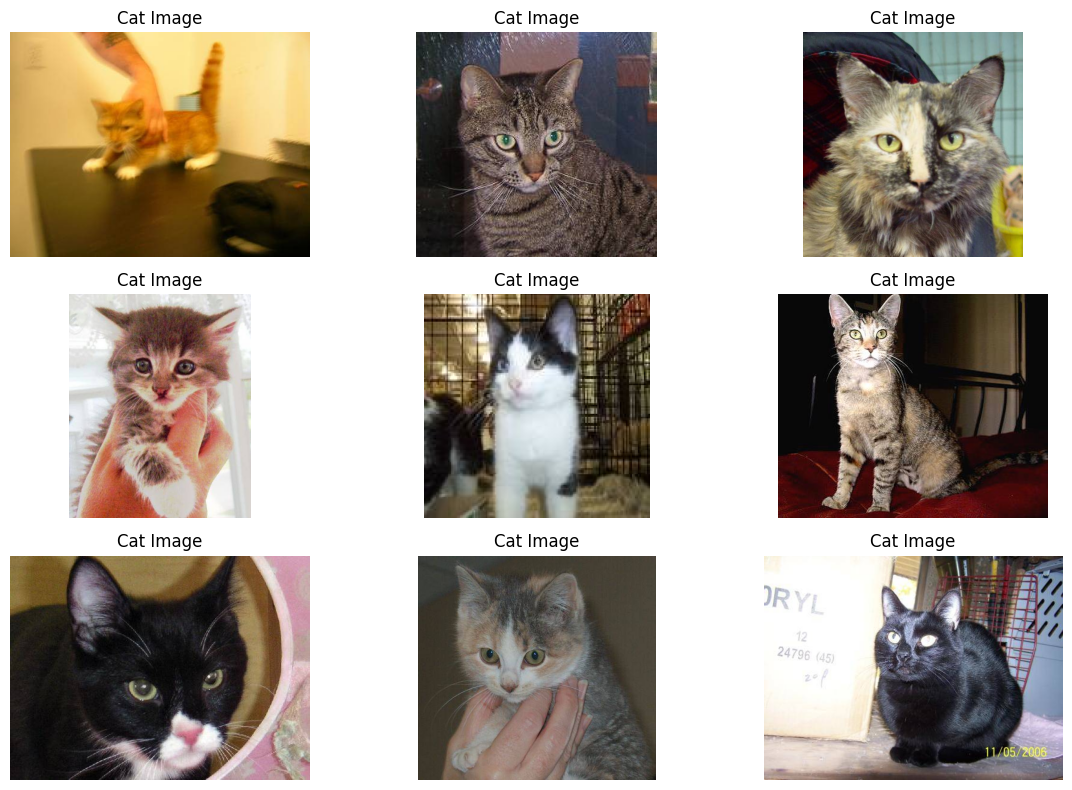

In [3]:
# Import and Check first 9 Cat Pictures

# Path to the directory containing your image data
# data_dir = "../data/raw"

# Get a list of all cat image file names
cats_subfolder = os.path.join(data_dir, "Cats")

# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [4]:
batch_size = 1000
img_height = 200
img_width = 200

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [6]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential()
# model.add(Flatten())
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
# model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
# model.add(Flatten())
model.add(Dense(units = 512,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

c:\Users\Philip Nancollas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
# model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [8]:
# Train the Model
model.fit(train_ds, epochs = 1)

: 

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,669,698 (113.18 MB)

 Trainable params: 29,669,698 (113.18 MB)

 Non-trainable params: 0 (0.00 B)